<a href="https://colab.research.google.com/github/Temesgenasmamaw/ML_web_app/blob/main/Copy_of_semester_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import seaborn as sns
from os import listdir
import tensorflow as tf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
# from tensorflow.keras.utils import img_to_array
# from keras_preprocessing.image import img_to_array
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,InputLayer,Flatten, Dropout, Dense,Activation

In [ ]:
!pip install split-folders #for spliting dataset with a given ratio
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
IMAGE_SIZE = 256
BATCH_SIZE =8
EPOCHS = 60
CHANNELS=3
LR = 1e-4


In [ ]:
disease_name=['Powdery Mildew']
disease_name

['Powdery Mildew']

In [ ]:
# # path_to_training_dataset = '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
# import Augmentor
# for i in disease_name:
#     Image_Generator = Augmentor.Pipeline('/content/drive/MyDrive/Augmented/Powdery/', output_directory='/content/drive/MyDrive/proj/Semester mango/'+i)
#     Image_Generator.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     Image_Generator.flip_top_bottom(probability=0.8)
#     Image_Generator.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
#     Image_Generator.shear(probability=0.5, max_shear_left=10, max_shear_right=10)
#     Image_Generator.flip_left_right(probability=0.5)
#     Image_Generator.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

#     Image_Generator.sample(400)

In [ ]:
# splitfolders.ratio('/content/drive/MyDrive/proj/Semester mango', output="/content/drive/MyDrive/proj/final-project", seed=1335, ratio=(0.8, 0.1,0.1)) 

In [ ]:
Image_Generator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode="reflect"
)

In [ ]:
train='/content/drive/MyDrive/proj/final-project/train'
val='/content/drive/MyDrive/proj/final-project/val'
test='/content/drive/MyDrive/proj/final-project/test'

In [ ]:
train_generator=Image_Generator.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    color_mode="rgb",
    shuffle=True,
    seed=123
)


Found 1257 images belonging to 5 classes.


In [ ]:
val_datagen=ImageDataGenerator(
    rescale=1.0/255,
)
val_generator=val_datagen.flow_from_directory(
    val,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="sparse",
    shuffle=True,
    seed=123
)


Found 154 images belonging to 5 classes.


In [ ]:
test_datagen=ImageDataGenerator(
    rescale=1.0/255,
)
test_generator=test_datagen.flow_from_directory(
    test,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="sparse",
)

Found 163 images belonging to 5 classes.


In [ ]:
#number of train,val and test dataset
train_generator.samples,val_generator.samples,test_generator.samples

(1257, 154, 163)

In [ ]:
class_name_indices=train_generator.class_indices
class_names=list(class_name_indices.keys())
class_names

['Anth', 'Heal', 'Not mango', 'Powdery Mildew', 'White']

In [ ]:
#shape of input dataset
for image_batch, labels_batch in train_generator:
  print(image_batch.shape) 
  break

(8, 256, 256, 3)


In [ ]:
num_classes = len(class_names)
num_classes

5

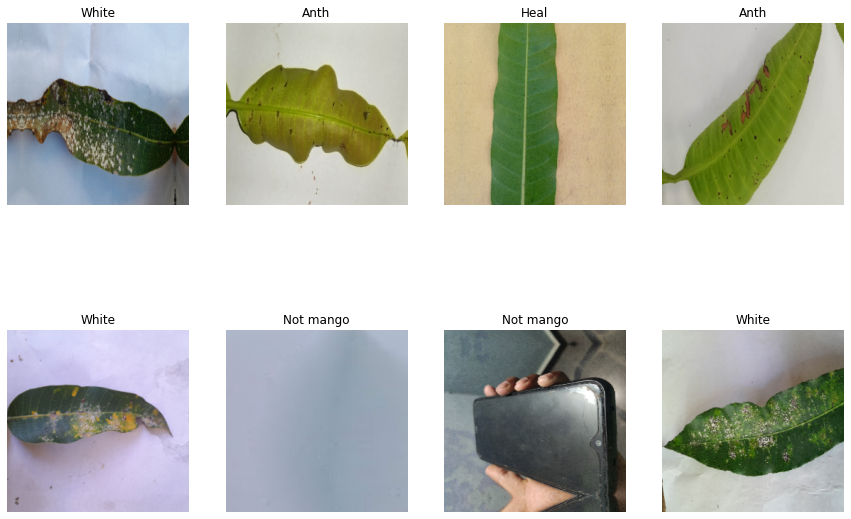

In [ ]:
plt.figure(figsize=(15,16))
for image_batch,label_batch in train_generator:
    for i in range(8):
        plt.subplot(3,4,i+1)
        plt.imshow((image_batch[i]*255).astype(np.uint8)) 
        plt.title( class_names[int(label_batch[i])])
        plt.axis('off')
    break

In [ ]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model =Sequential([
        InputLayer(input_shape=input_shape),


       Conv2D(32, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

          Conv2D(64, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(128, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(256, (3,3), padding='same',activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(512, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(1024, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),
         Dropout(0.5),

         Conv2D(1024, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),
         Dropout(0.5),

         Flatten(),

         Dense(1024,activation='relu'),
         Dense(128,activation='relu'),

         Dense(64,activation='relu'),

         Dense(5,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [ ]:
model_check_point=ModelCheckpoint(filepath="/content/drive/MyDrive/best_model.h5",
                   monitor="val_loss",
                   verbose=0,
                   save_best_only=True)
early_stop=EarlyStopping(monitor="val_accuracy",patience=30,verbose=1)
log_csv=CSVLogger('/content/drive/MyDrive/my_logs.csv',separator=',',append=False)
call_backs=[model_check_point,early_stop,log_csv]
opt = Adam(learning_rate=LR)

In [ ]:
model.compile(
optimizer=opt,
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])
print("[INFO] training network...")

[INFO] training network...


In [ ]:
steps_per_epoch=int((train_generator.samples)/BATCH_SIZE)
validation_step=int((val_generator.samples)/BATCH_SIZE)
steps_per_epoch,validation_step

(157, 19)

In [ ]:
history=model.fit(
     train_generator,
     verbose=1,
     epochs=50,
     callbacks=call_backs,
     batch_size=BATCH_SIZE,
     validation_data=val_generator,
     steps_per_epoch=steps_per_epoch,
     validation_steps=validation_step
        
)

Epoch 1/50
157/157 [==============================] - 422s 3s/step - loss: 1.4360 - accuracy: 0.3611 - val_loss: 1.2341 - val_accuracy: 0.5855
Epoch 2/50
157/157 [==============================] - 149s 948ms/step - loss: 0.8463 - accuracy: 0.6541 - val_loss: 0.6973 - val_accuracy: 0.6711
Epoch 3/50
157/157 [==============================] - 155s 994ms/step - loss: 0.7352 - accuracy: 0.7046 - val_loss: 0.5767 - val_accuracy: 0.7237
Epoch 4/50
157/157 [==============================] - 152s 965ms/step - loss: 0.6132 - accuracy: 0.7518 - val_loss: 0.6104 - val_accuracy: 0.7303
Epoch 5/50
157/157 [==============================] - 153s 976ms/step - loss: 0.5931 - accuracy: 0.7694 - val_loss: 0.4404 - val_accuracy: 0.8618
Epoch 6/50
157/157 [==============================] - 174s 1s/step - loss: 0.4900 - accuracy: 0.8359 - val_loss: 0.4033 - val_accuracy: 0.8882
Epoch 7/50
157/157 [==============================] - 160s 1s/step - loss: 0.4181 - accuracy: 0.8583 - val_loss: 0.5822 - val_accu

In [ ]:
model.evaluate(test_generator)

21/21 [==============================] - 49s 2s/step - loss: 0.3699 - accuracy: 0.9448


[0.36993494629859924, 0.9447852969169617]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

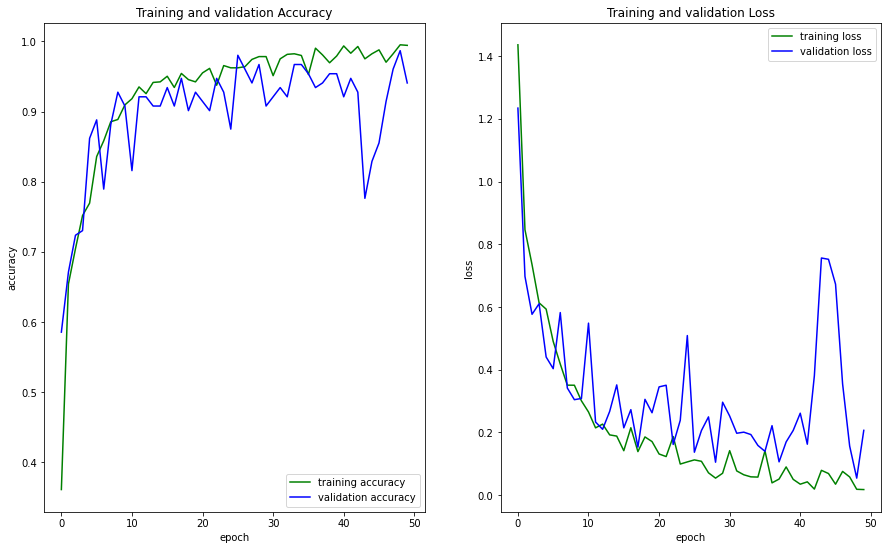

In [ ]:
plt.figure(figsize=(15,9))
#accuracy graph
plt.subplot(1,2,1)
plt.plot(acc,'g',label='training accuracy')
plt.plot(val_acc,'b',label='validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and validation Accuracy')

#loss graph
plt.subplot(1,2,2)
plt.plot(loss,'g',label='training loss')
plt.plot(val_loss,'b',label='validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Training and validation Loss')
plt.show()

21/21 [==============================] - 14s 702ms/step


<AxesSubplot:>

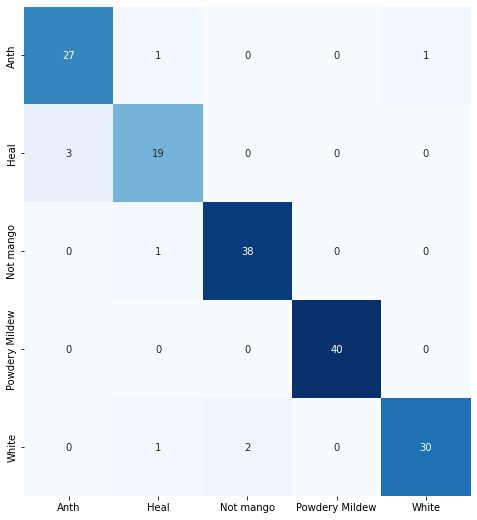

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

import sklearn.metrics as metrics

import seaborn as sns

y_pred = model.predict(test_generator)
plt.figure(figsize=(8,9))
y_prediction_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(test_generator.classes,y_prediction_labels)
sns.heatmap(cm,annot=True,cmap="Blues",cbar=False,fmt='d',xticklabels=class_names,yticklabels=class_names,)

In [ ]:
Y_pred = model.predict(test_generator, test_generator.samples // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')

print(classification_report(test_generator.classes, y_pred))

21/21 [==============================] - 14s 699ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.86      0.86      0.86        22
           2       0.95      0.97      0.96        39
           3       1.00      1.00      1.00        40
           4       0.97      0.91      0.94        33

    accuracy                           0.94       163
   macro avg       0.94      0.94      0.94       163
weighted avg       0.95      0.94      0.94       163



In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)#create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 18ms/step


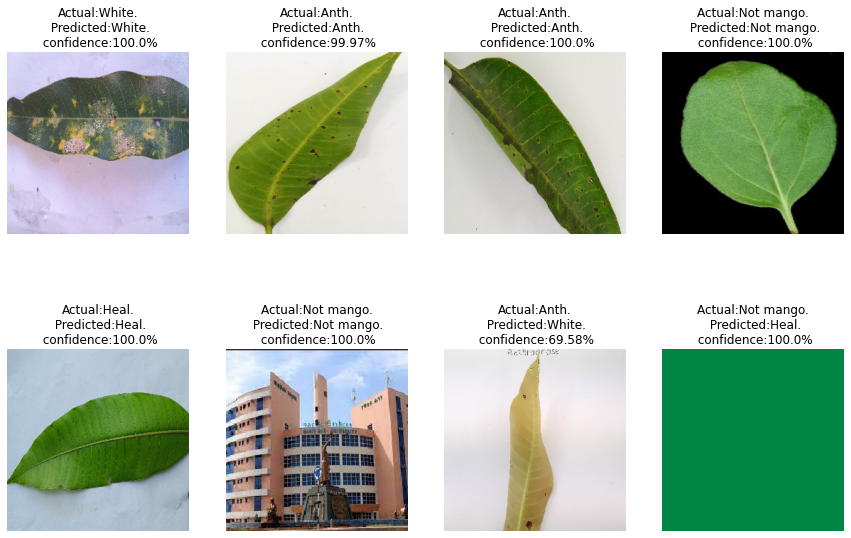

In [ ]:
plt.figure(figsize=(15,10))
for images,labels in test_generator:
    for i in range (8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[int(labels[i])]
        
        plt.title(f"Actual:{actual_class}.\n Predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis('off')
    plt.show()
    break

In [ ]:
model.save('myModel.h5')

In [ ]:
my_model=load_model('myModel.h5')

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [ ]:
train_loss,train_acc=my_model.evaluate(train_generator,steps=steps_per_epoch,verbose=0)
val_loss,val_acc=my_model.evaluate(val_generator,steps=validation_step ,verbose=0)
print('Train: %0.3f,Test: %0.3f' %(train_acc,val_acc))
print('Train_Loss: %0.3f,Test_Loss: %0.3f' %(train_loss,val_loss))

Train: 0.989,Test: 0.934
Train_Loss: 0.024,Test_Loss: 0.221


In [ ]:
my_model.evaluate(test_generator)

21/21 [==============================] - 15s 744ms/step - loss: 0.3699 - accuracy: 0.9448


[0.36993488669395447, 0.9447852969169617]

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)#create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 21ms/step


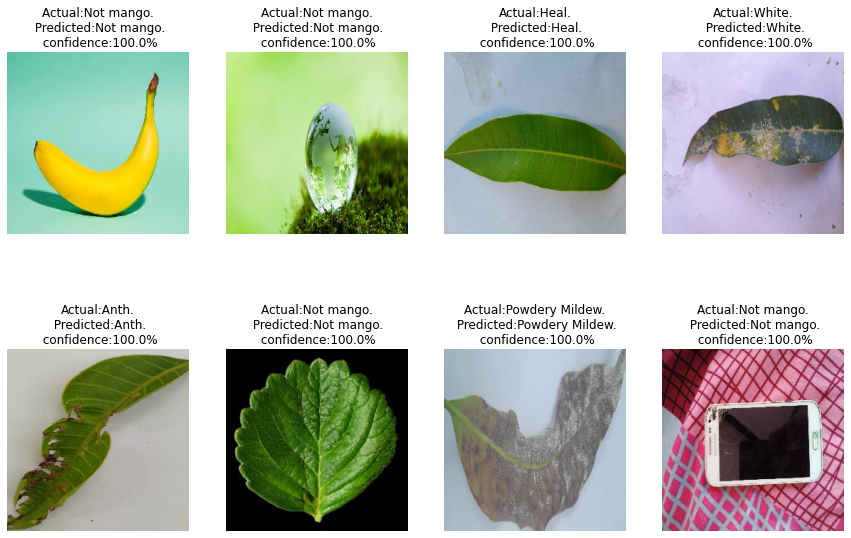

In [ ]:
plt.figure(figsize=(15,10))
for images,labels in test_generator:
    for i in range (8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        
        predicted_class,confidence=predict(my_model,images[i])
        actual_class=class_names[int(labels[i])]
        
        plt.title(f"Actual:{actual_class}.\n Predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis('off')
    plt.show()
    break

## External data

In [ ]:
directory_root='/content/drive/MyDrive/test_data/'  # this is test_all dataset that was given.... 
Image_Gen=ImageDataGenerator(
    rescale=1.0/255
)
ttest_gen=Image_Gen.flow_from_directory(
    directory_root,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [ ]:
def predi(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)#create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    return predicted_class,confidence

In [ ]:
plt.figure(figsize=(15,10))
for images,labels in ttest_gen:
    for i in range (8):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i])
        predicted_class,confidence=predi(model,images[i])
        plt.title(f" Predicted:{predicted_class}")
        plt.axis('off')
    plt.show()
    break

## Quantization

In [ ]:
!pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 7.3 MB/s eta 0:00:00


In [ ]:
import tensorflow_model_optimization as tfmot
quantize_model = tfmot.quantization.keras.quantize_model
# q_aware stands for for quantization aware.
q_aware_model = quantize_model(my_model)

# quantize_model requires a recompile.
q_aware_model.compile(
            tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_1 (QuantizeL  (None, 256, 256, 3)      3         
 ayer)                                                           
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 256, 256, 32)     963       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 128, 128, 32)     1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 128, 128, 64)     18627     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 64, 64, 64)       1

In [ ]:
# quantize_model requires a retrain.
q_aware_model.fit(train_generator,
                  batch_size=BATCH_SIZE,
                  validation_data=val_generator,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_step,
                  epochs=4)

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_qaware=converter.convert()

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
with open("/content/drive/MyDrive/proj/final-project/optimized_tflite_model.tflite", 'wb') as f:
    f.write(tflite_qaware)